In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import numpy as np
import os
import gzip
import glob
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from time import time
import random
from keras.preprocessing import image

In [4]:
from tensorflow.python.keras import models
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D,Dropout
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten,BatchNormalization
from tensorflow.python.keras.optimizers import Adam,RMSprop,SGD
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.python.keras.datasets import mnist
import keras.backend as K
from keras import backend as K

Using TensorFlow backend.


In [6]:
tf.__version__

'1.12.0'

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x = np.concatenate((x_train,x_test))
y_class = np.concatenate((y_train,y_test))

In [9]:
num_classes = 10
img_size_flat = 28*28
img_shape_full = (28,28)
TotalSize = 70000

In [10]:
x_train, x_test, y_train_cls, y_test_cls = train_test_split(x.reshape(TotalSize,28,28,1), y_class, test_size=0.40, random_state=42)
train_size = y_train_cls.shape[0]
test_size = y_test_cls.shape[0]
print(train_size,test_size)

42000 28000


In [11]:
b = np.zeros((train_size, num_classes))
b[np.arange(train_size), y_train_cls] = 1
y_train = b

In [12]:
b = np.zeros((test_size, num_classes))
b[np.arange(test_size), y_test_cls] = 1
y_test = b

In [13]:
x_train[0].shape

(28, 28, 1)

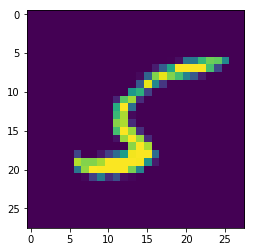

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [14]:
imgplot = plt.imshow(x_train[0].reshape(28,28))
plt.show()
print(y_train[5])

In [15]:
def Def_Model1():
    model = Sequential()

    model.add(InputLayer(input_shape=(28,28,1,)))
    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv1'))
    model.add(Conv2D(kernel_size=3, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv3'))
    model.add(Conv2D(kernel_size=3, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv4'))
    
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=2, strides=2))


    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model
def Def_Model2():
    model = Sequential()

    model.add(InputLayer(input_shape=(28,28,1,)))

    model.add(Conv2D(kernel_size=7, strides=1, filters=16,
                     activation='relu', name='layer_conv1'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=2, strides=2))


    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model
def Def_Model3():
    model = Sequential()

    model.add(InputLayer(input_shape=(28,28,1,)))

    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='valid',
                     activation='relu', name='layer_conv1'))

    model.add(BatchNormalization())

    #model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='valid',
                     activation='relu', name='layer_conv2'))

    model.add(BatchNormalization())


    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model
def Def_Model4():
    model = Sequential()

    model.add(InputLayer(input_shape=(28,28,1,)))

    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv1'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=2, strides=2))
    
    
    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv2'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=2, strides=2))
    
    
    model.add(Conv2D(kernel_size=7, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv3'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=2, strides=2))
    
    model.add(Conv2D(kernel_size=7, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv4'))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=2, strides=2))
   
   
   

    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def Def_Model5():
    model = Sequential()

    model.add(InputLayer(input_shape=(28,28,1,)))

    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv1'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())
 

    
    
    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv2'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=2, strides=2))
    
    
    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv3'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=2, strides=2))
   

    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def Def_Model6():
    model = Sequential()

    model.add(InputLayer(input_shape=(28,28,1,)))

    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='valid',
                     activation='relu', name='layer_conv1'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())
    
    
    model.add(Conv2D(kernel_size=3, strides=1, filters=32, padding='valid',
                     activation='relu', name='layer_conv2'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())

    
    
    model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv3'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())
    
    model.add(Conv2D(kernel_size=3, strides=1, filters=64, padding='same',
                     activation='relu', name='layer_conv4'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())   
   

    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def Def_Model7():
    model = Sequential()

    model.add(InputLayer(input_shape=(28,28,1,)))

    model.add(Conv2D(kernel_size=5, strides=1, filters=128, padding='valid',
                     activation='relu', name='layer_conv1'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())
    
    
    model.add(Conv2D(kernel_size=3, strides=1, filters=128, padding='valid',
                     activation='relu', name='layer_conv2'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())

    
    
    model.add(Conv2D(kernel_size=5, strides=1, filters=64, padding='same',
                     activation='relu', name='layer_conv3'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())
    
    model.add(Conv2D(kernel_size=3, strides=1, filters=32, padding='same',
                     activation='relu', name='layer_conv4'))
    model.add(Dropout(0.25))

    model.add(BatchNormalization())   
   

    model.add(Flatten())

    model.add(Dense(1024, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [13]:
model1 = Def_Model1()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 28, 28, 32)        832       
_________________________________________________________________
layer_conv3 (Conv2D)         (None, 28, 28, 32)        9248      
_________________________________________________________________
layer_conv4 (Conv2D)         (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              6423552   
__________

In [14]:
optimizer = Adam(lr=1e-4)
model1.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = TensorBoard(log_dir='model1minist/{}'.format(time()))
model1.fit(x=x_train,
          y=y_train,
          epochs=3, batch_size=128,verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard])

Train on 42000 samples, validate on 28000 samples
Epoch 1/3
42000/42000 [==============================] - 29s 696us/step - loss: 0.1726 - acc: 0.9467 - val_loss: 0.0767 - val_acc: 0.9767
Epoch 2/3
42000/42000 [==============================] - 17s 404us/step - loss: 0.0394 - acc: 0.9884 - val_loss: 0.0700 - val_acc: 0.9796
Epoch 3/3
42000/42000 [==============================] - 17s 404us/step - loss: 0.0171 - acc: 0.9950 - val_loss: 0.0486 - val_acc: 0.9854


In [15]:
result = model1.evaluate(x=x_test,
                        y=y_test)
for name, value in zip(model1.metrics_names, result):
    print(name, value)
model1.save("Task12_minist1.h5")   

28000/28000 [==============================] - 3s 124us/step
loss 0.048638307643405695
acc 0.9853571428571428


In [16]:
model2 = Def_Model2()
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 22, 22, 16)        800       
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1936)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1983488   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 1,994,602
Trainable params: 1,994,570
Non-trainable params: 32
_________________________________________________________________

In [17]:
optimizer = Adam(lr=1e-4)
model2.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = TensorBoard(log_dir='model2minist/{}'.format(time()))
model2.fit(x=x_train,
          y=y_train,
          epochs=3, batch_size=128,verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard])

Train on 42000 samples, validate on 28000 samples
Epoch 1/3
42000/42000 [==============================] - 5s 111us/step - loss: 0.2014 - acc: 0.9379 - val_loss: 0.0893 - val_acc: 0.9747
Epoch 2/3
42000/42000 [==============================] - 4s 103us/step - loss: 0.0581 - acc: 0.9832 - val_loss: 0.0672 - val_acc: 0.9794
Epoch 3/3
42000/42000 [==============================] - 4s 103us/step - loss: 0.0344 - acc: 0.9905 - val_loss: 0.0568 - val_acc: 0.9827


In [18]:
result = model2.evaluate(x=x_test,
                        y=y_test)
for name, value in zip(model2.metrics_names, result):
    print(name, value)
model2.save("Task12_minist2.h5")   

28000/28000 [==============================] - 1s 39us/step
loss 0.05677692559354806
acc 0.9826785714285714


In [19]:
model3 = Def_Model3()
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 20, 20, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 20, 20, 32)        128       
_________________________________________________________________
flatten_2 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              13108224  
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10250     
Total para

In [20]:
optimizer = Adam(lr=1e-4)
model3.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = TensorBoard(log_dir='model3minist/{}'.format(time()))
model3.fit(x=x_train,
          y=y_train,
          epochs=3, batch_size=128,verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard])

Train on 42000 samples, validate on 28000 samples
Epoch 1/3
42000/42000 [==============================] - 20s 465us/step - loss: 0.1483 - acc: 0.9549 - val_loss: 0.0697 - val_acc: 0.9787
Epoch 2/3
42000/42000 [==============================] - 20s 466us/step - loss: 0.0175 - acc: 0.9948 - val_loss: 0.0695 - val_acc: 0.9792
Epoch 3/3
42000/42000 [==============================] - 19s 444us/step - loss: 0.0053 - acc: 0.9988 - val_loss: 0.0582 - val_acc: 0.9836


In [21]:
result = model3.evaluate(x=x_test,
                        y=y_test)
for name, value in zip(model3.metrics_names, result):
    print(name, value)
model3.save("Task12_minist3.h5")   

28000/28000 [==============================] - 3s 122us/step
loss 0.058238421496308417
acc 0.9836428571428572


In [22]:
model4 = Def_Model4()
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 32)        25632     
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
layer_conv3 (Conv2D)         (None, 7, 7, 32)          50208     
__________

In [23]:
optimizer = Adam(lr=1e-4)
model4.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = TensorBoard(log_dir='model4minist/{}'.format(time()))
model4.fit(x=x_train,
          y=y_train,
          epochs=3, batch_size=128,verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard])

Train on 42000 samples, validate on 28000 samples
Epoch 1/3
42000/42000 [==============================] - 10s 239us/step - loss: 0.4484 - acc: 0.8862 - val_loss: 0.1480 - val_acc: 0.9701
Epoch 2/3
42000/42000 [==============================] - 9s 212us/step - loss: 0.0696 - acc: 0.9795 - val_loss: 0.0694 - val_acc: 0.9785
Epoch 3/3
42000/42000 [==============================] - 9s 212us/step - loss: 0.0397 - acc: 0.9889 - val_loss: 0.0567 - val_acc: 0.9820


In [24]:
result = model4.evaluate(x=x_test,
                        y=y_test)
for name, value in zip(model4.metrics_names, result):
    print(name, value)
model4.save("Task12_minist4.h5")   

28000/28000 [==============================] - 2s 86us/step
loss 0.0566943829646334
acc 0.9819642857142857


In [16]:
model5 = Def_Model5()
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 28, 28, 32)        832       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 28, 28, 32)        25632     
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
__________

In [17]:
optimizer = Adam(lr=1e-4)
model5.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = TensorBoard(log_dir='model5minist/{}'.format(time()))
model5.fit(x=x_train,
          y=y_train,
          epochs=3, batch_size=128,verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard])

Train on 42000 samples, validate on 28000 samples
Epoch 1/3


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node layer_conv1/Conv2D}} = Conv2D[T=DT_FLOAT, _class=["loc:@training/Adam/gradients/layer_conv1/Conv2D_grad/Conv2DBackpropFilter"], data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training/Adam/gradients/layer_conv1/Conv2D_grad/Conv2DBackpropFilter-0-TransposeNHWCToNCHW-LayoutOptimizer, layer_conv1/Conv2D/ReadVariableOp)]]
	 [[{{node loss/dense_1_loss/broadcast_weights/assert_broadcastable/is_valid_shape/has_valid_nonscalar_shape/has_invalid_dims/ExpandDims_1/_179}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_758_l...pandDims_1", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [ ]:
result = model5.evaluate(x=x_test,
                        y=y_test)
for name, value in zip(model5.metrics_names, result):
    print(name, value)
model5.save("Task12_minist5.h5")   

In [29]:
model6 = Def_Model6()
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 24, 24, 32)        832       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 22, 22, 32)        9248      
_________________________________________________________________
dropout_4 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
layer_conv3 (Conv2D)         (None, 22, 22, 32)        25632     
__________

In [30]:
optimizer = Adam(lr=1e-4)
model6.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = TensorBoard(log_dir='model6minist/{}'.format(time()))
model6.fit(x=x_train,
          y=y_train,
          epochs=3, batch_size=128,verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard])

Train on 42000 samples, validate on 28000 samples
Epoch 1/3
42000/42000 [==============================] - 52s 1ms/step - loss: 0.2576 - acc: 0.9200 - val_loss: 0.1433 - val_acc: 0.9571
Epoch 2/3
42000/42000 [==============================] - 49s 1ms/step - loss: 0.0805 - acc: 0.9747 - val_loss: 0.0599 - val_acc: 0.9815
Epoch 3/3
42000/42000 [==============================] - 51s 1ms/step - loss: 0.0520 - acc: 0.9835 - val_loss: 0.0608 - val_acc: 0.9825


In [31]:
result = model6.evaluate(x=x_test,
                        y=y_test)
for name, value in zip(model6.metrics_names, result):
    print(name, value)
model6.save("Task12_minist6.h5")   

28000/28000 [==============================] - 7s 244us/step
loss 0.0607991006094214
acc 0.9825357142857143


In [32]:
model7 = Def_Model7()
model7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 24, 24, 128)       3328      
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 128)       0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 24, 24, 128)       512       
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 22, 22, 128)       147584    
_________________________________________________________________
dropout_8 (Dropout)          (None, 22, 22, 128)       0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 22, 22, 128)       512       
_________________________________________________________________
layer_conv3 (Conv2D)         (None, 22, 22, 64)        204864    
__________

In [33]:
optimizer = Adam(lr=1e-4)
model7.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = TensorBoard(log_dir='model7minist/{}'.format(time()))
model7.fit(x=x_train,
          y=y_train,
          epochs=3, batch_size=128,verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard])

Train on 42000 samples, validate on 28000 samples
Epoch 1/3
42000/42000 [==============================] - 69s 2ms/step - loss: 0.2201 - acc: 0.9316 - val_loss: 0.0849 - val_acc: 0.9756
Epoch 2/3
42000/42000 [==============================] - 65s 2ms/step - loss: 0.0602 - acc: 0.9816 - val_loss: 0.0511 - val_acc: 0.9845
Epoch 3/3
42000/42000 [==============================] - 65s 2ms/step - loss: 0.0390 - acc: 0.9872 - val_loss: 0.0510 - val_acc: 0.9865


In [34]:
result = model7.evaluate(x=x_test,
                        y=y_test)
for name, value in zip(model7.metrics_names, result):
    print(name, value)
model7.save("Task12_minist7.h5")   

28000/28000 [==============================] - 11s 387us/step
loss 0.05101449726257748
acc 0.9864642857142857


In [35]:
def print_confusion_matrix(cm):
    recall=[]
    precision=[]
    recall_val = 0
    for i in range(len(cm)):
        num = cm[i][i]
        row_sum=cm[i].sum()
        recall_val = (1.0*num/row_sum)
        recall.append(recall_val);
        precision_val = (1.0*cm[i][i]/cm[:,i].sum())
        precision.append(precision_val)
    f = []
    f.append(np.array(recall))
    f.append(np.array(precision))
    f_score=[]
    for i in range(len(recall)):
        val = 2.0 * recall[i] * precision[i]
        val /= (precision[i]+recall[i])
        f_score.append(val)
    f.append(np.array(f_score))
    print(np.array(f))
    plt.figure(figsize=(6,6), dpi=200)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    plt.savefig('3.png')

[[0.99172066 0.98955366 0.98788311 0.98232591 0.99169184 0.98742138
  0.99132321 0.97956449 0.97148218 0.98049645]
 [0.98816356 0.99332698 0.97985154 0.98721137 0.98204936 0.98355521
  0.98739647 0.99017948 0.98515982 0.97530864]
 [0.98993891 0.99143673 0.98385093 0.98476258 0.98684705 0.9854845
  0.98935594 0.98484338 0.97827319 0.97789567]]


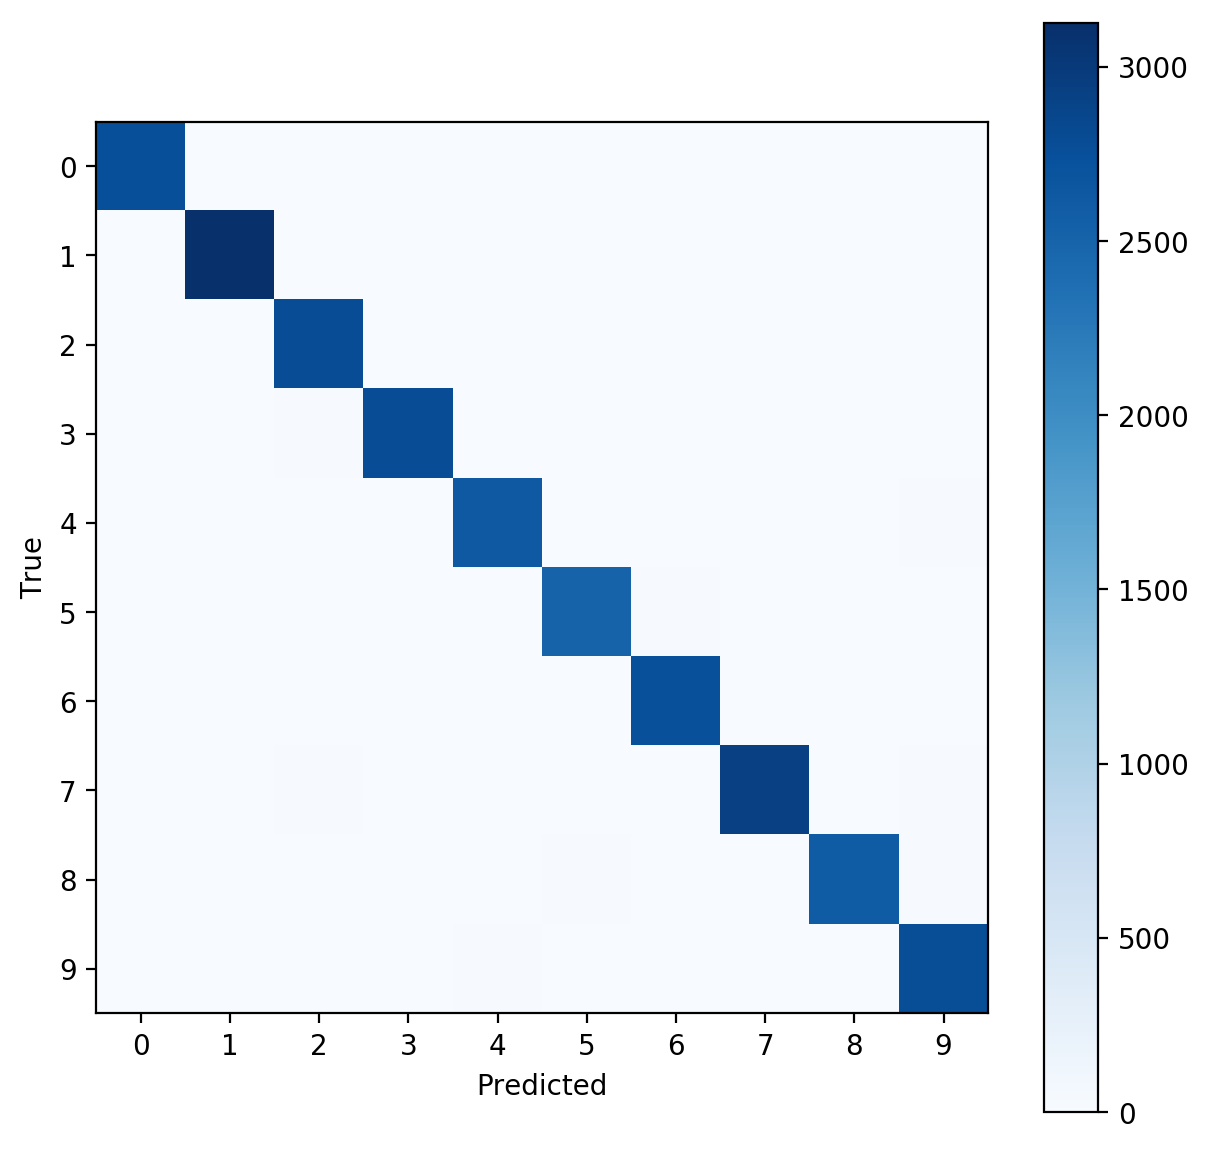

<Figure size 432x288 with 0 Axes>

In [36]:
# Predicting the Test set results
y_pred = model1.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print_confusion_matrix(cm)

[[0.99208063 0.98733777 0.98253742 0.98232591 0.98753776 0.9783805
  0.99240781 0.98458961 0.97223265 0.96631206]
 [0.98958707 0.99362854 0.97731301 0.98267327 0.98013493 0.98185404
  0.98634567 0.97382372 0.97995461 0.98056855]
 [0.99083228 0.99047317 0.97991825 0.98249956 0.98382242 0.9801142
  0.98936745 0.97917708 0.97607836 0.97338811]]


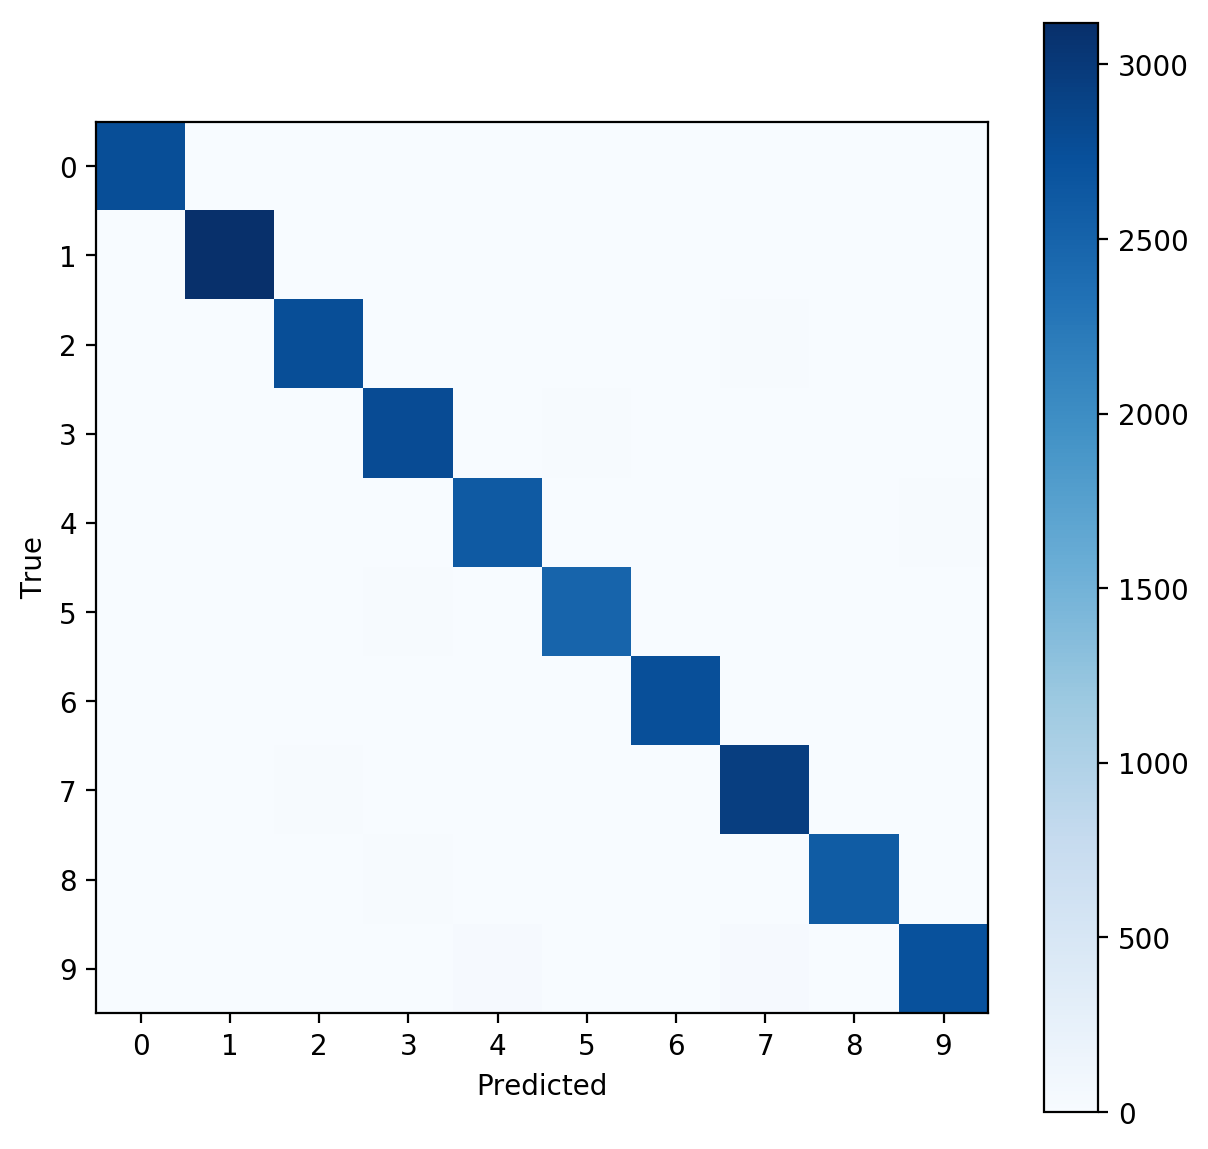

<Figure size 432x288 with 0 Axes>

In [37]:
# Predicting the Test set results
y_pred = model2.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print_confusion_matrix(cm)

[[0.99208063 0.9920861  0.98503207 0.97490279 0.98074018 0.98034591
  0.98951555 0.9798995  0.97861163 0.98191489]
 [0.98781362 0.99020537 0.97840708 0.98782235 0.98858013 0.98343849
  0.98915793 0.98617667 0.97168405 0.97226124]
 [0.98994253 0.99114485 0.9817084  0.98132005 0.98464455 0.98188976
  0.98933671 0.98302806 0.97513554 0.97706422]]


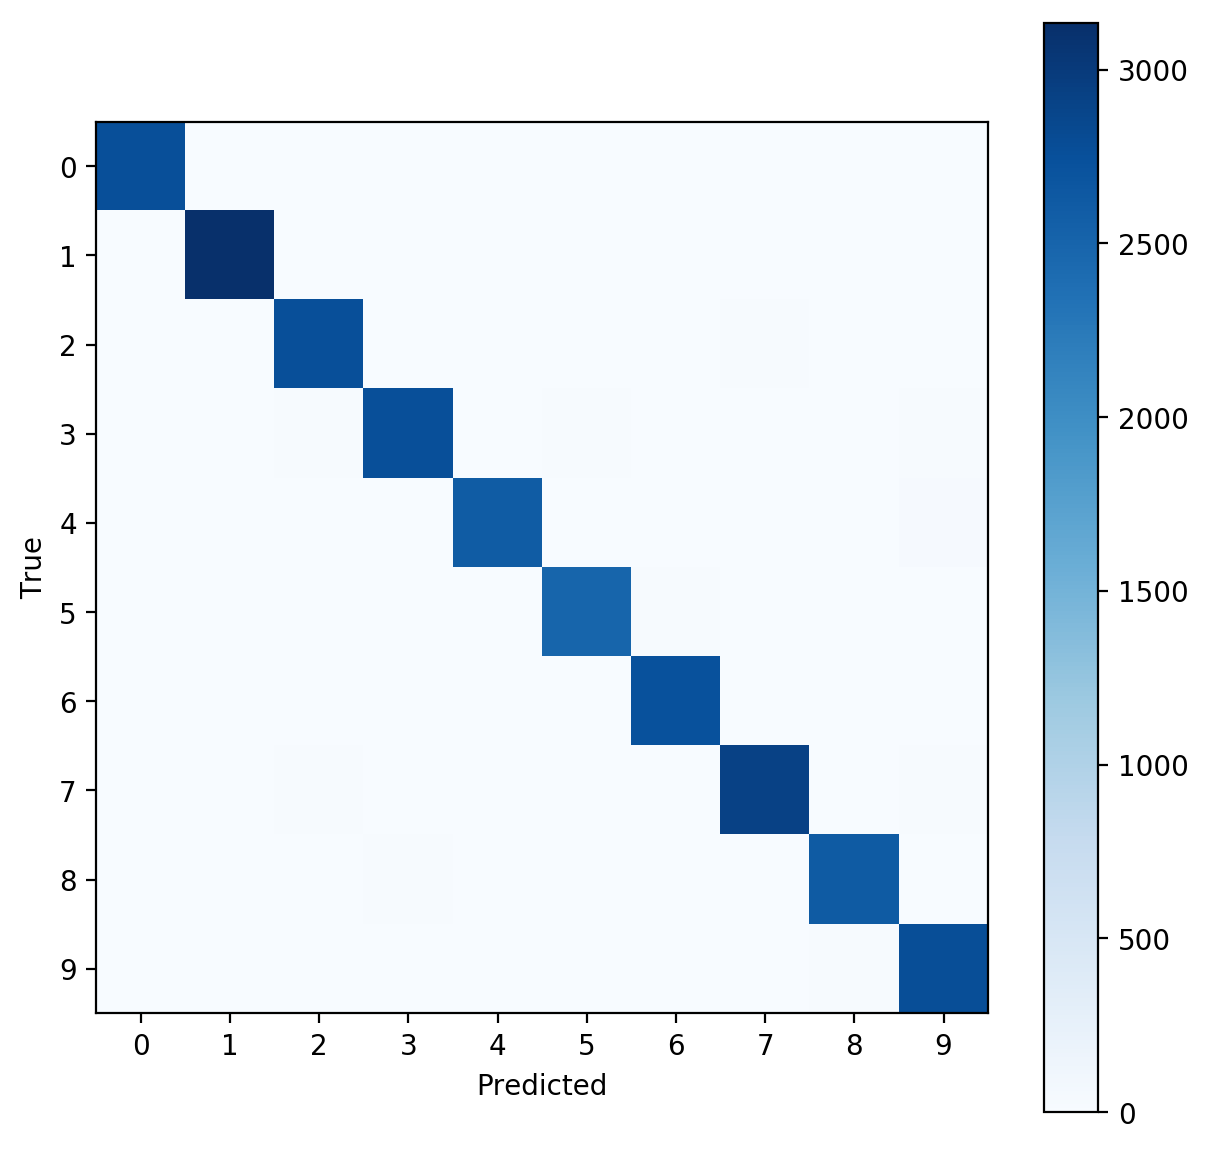

<Figure size 432x288 with 0 Axes>

In [38]:
# Predicting the Test set results
y_pred = model3.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print_confusion_matrix(cm)

[[0.99208063 0.98955366 0.97576622 0.97242842 0.97922961 0.98506289
  0.98987708 0.98291457 0.96622889 0.98510638]
 [0.98745969 0.99206601 0.982771   0.99135135 0.98518237 0.97509728
  0.98560115 0.9825854  0.98132622 0.95562436]
 [0.98976477 0.99080824 0.97925608 0.98179872 0.98219697 0.98005475
  0.98773449 0.98274996 0.97371904 0.97014144]]


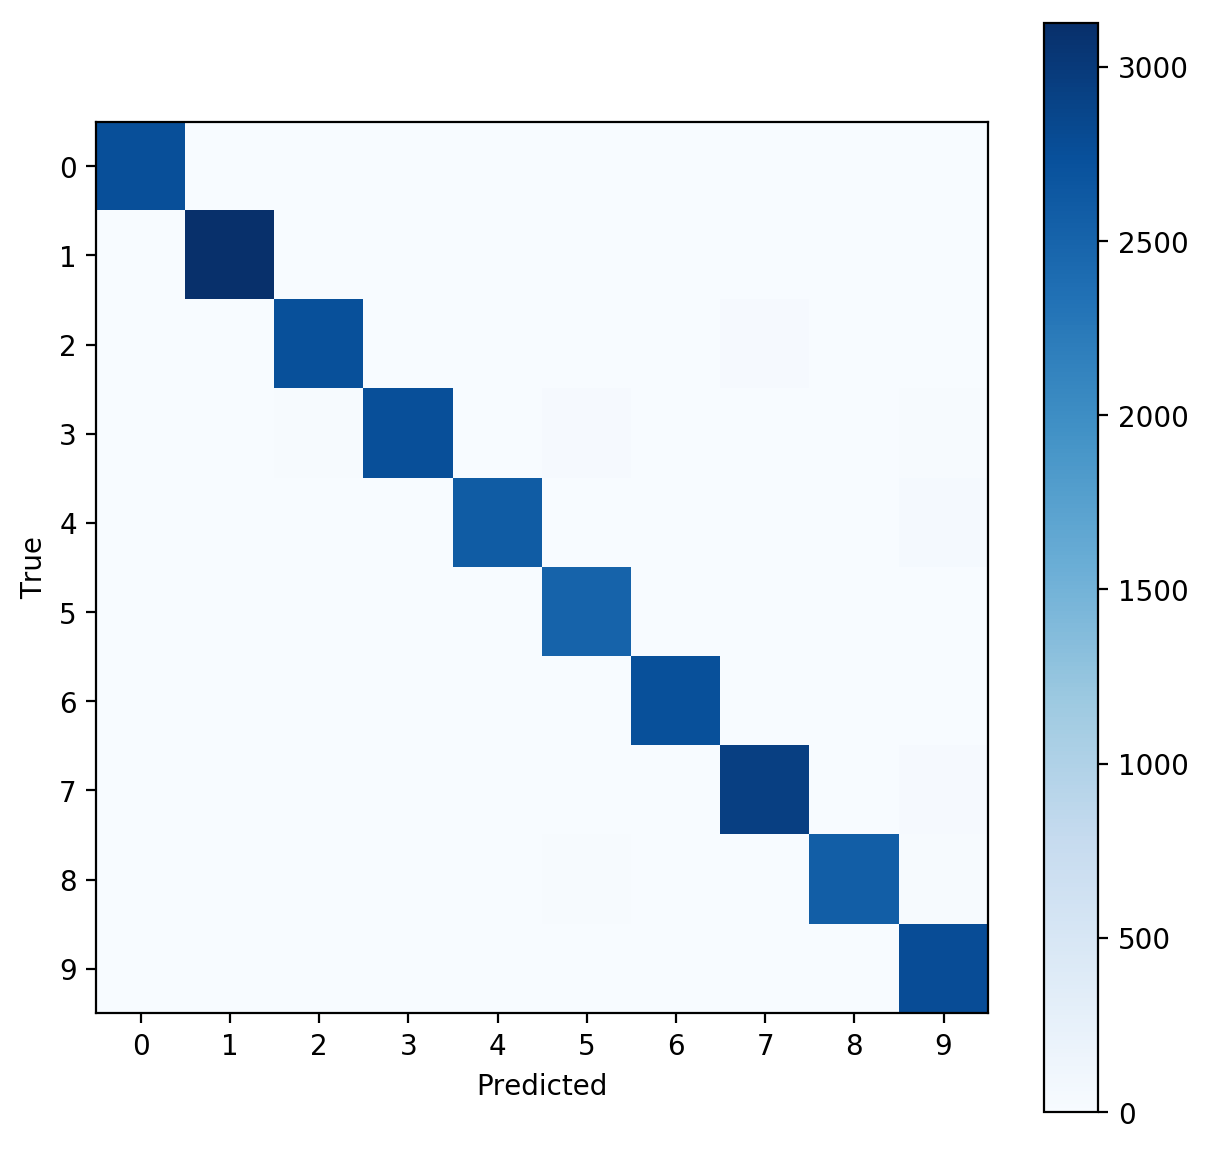

<Figure size 432x288 with 0 Axes>

In [39]:
# Predicting the Test set results
y_pred = model4.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print_confusion_matrix(cm)

[[0.9974802  0.99493511 0.95509622 0.97030753 0.93731118 0.98781447
  0.98987708 0.98291457 0.96585366 0.9893617 ]
 [0.96719023 0.9769972  0.99332839 0.99456522 0.99758842 0.98356164
  0.98737829 0.97930574 0.98281787 0.92109607]
 [0.98210172 0.98588457 0.97383721 0.98228663 0.9665109  0.98568347
  0.98862611 0.98110684 0.97426192 0.95400923]]


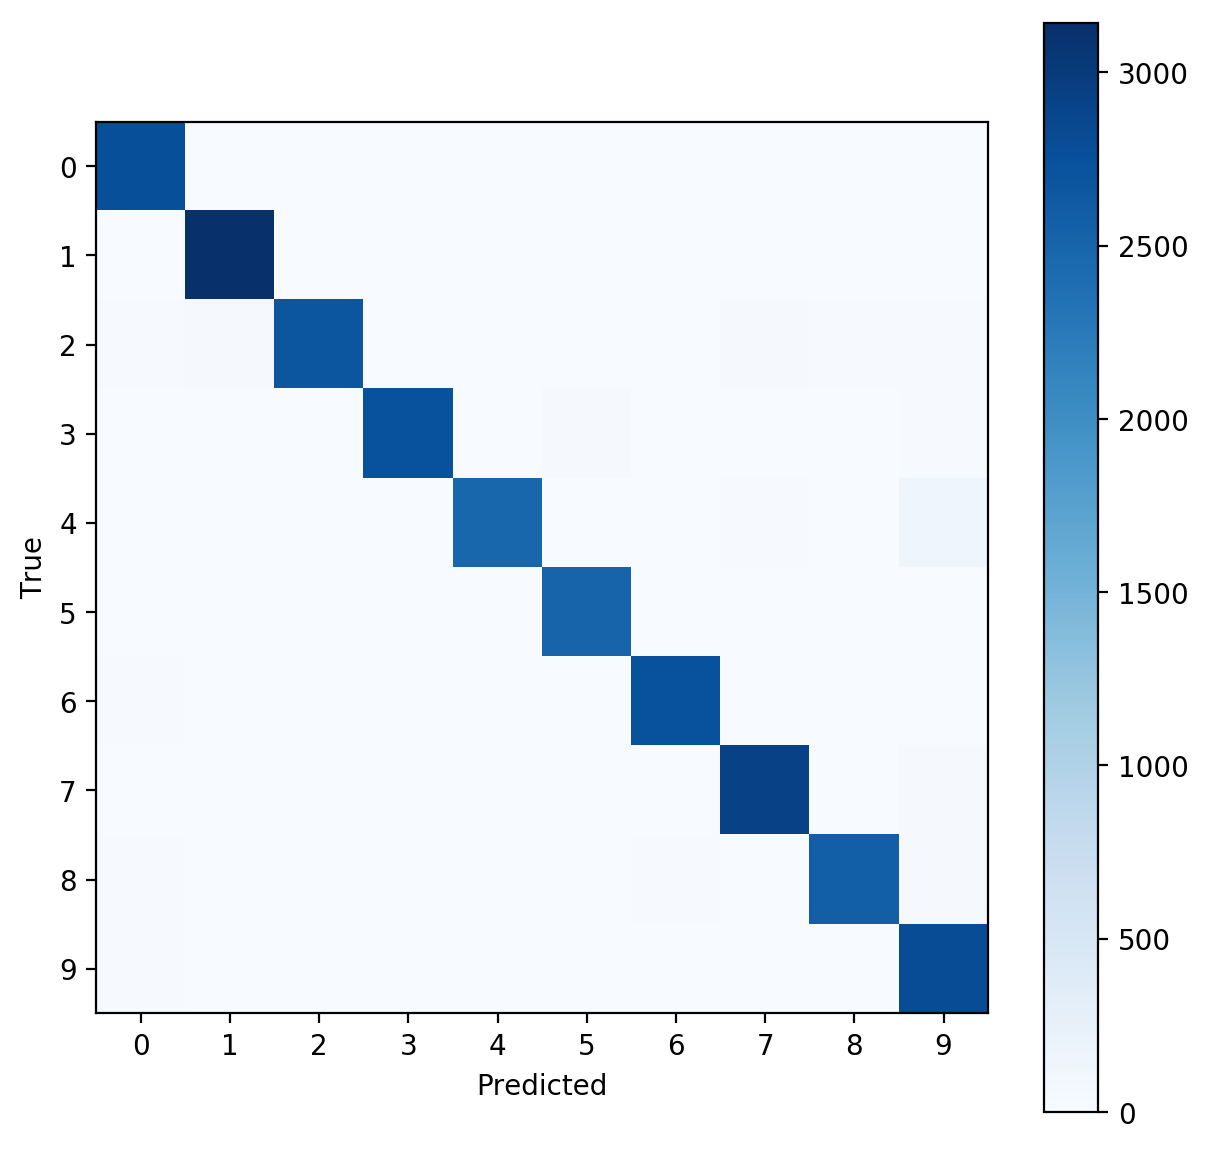

<Figure size 432x288 with 0 Axes>

In [40]:
# Predicting the Test set results
y_pred = model5.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print_confusion_matrix(cm)

[[0.98524118 0.99746755 0.97968639 0.99328385 0.96487915 0.98073899
  0.99855387 0.98023451 0.9564728  0.98475177]
 [0.99382716 0.97735732 0.98991718 0.97569444 0.99726776 0.98929421
  0.97116737 0.98220879 0.99570313 0.95824707]
 [0.98951555 0.98731004 0.98477521 0.98441058 0.98080614 0.98499803
  0.98467023 0.98122066 0.97569378 0.97131864]]


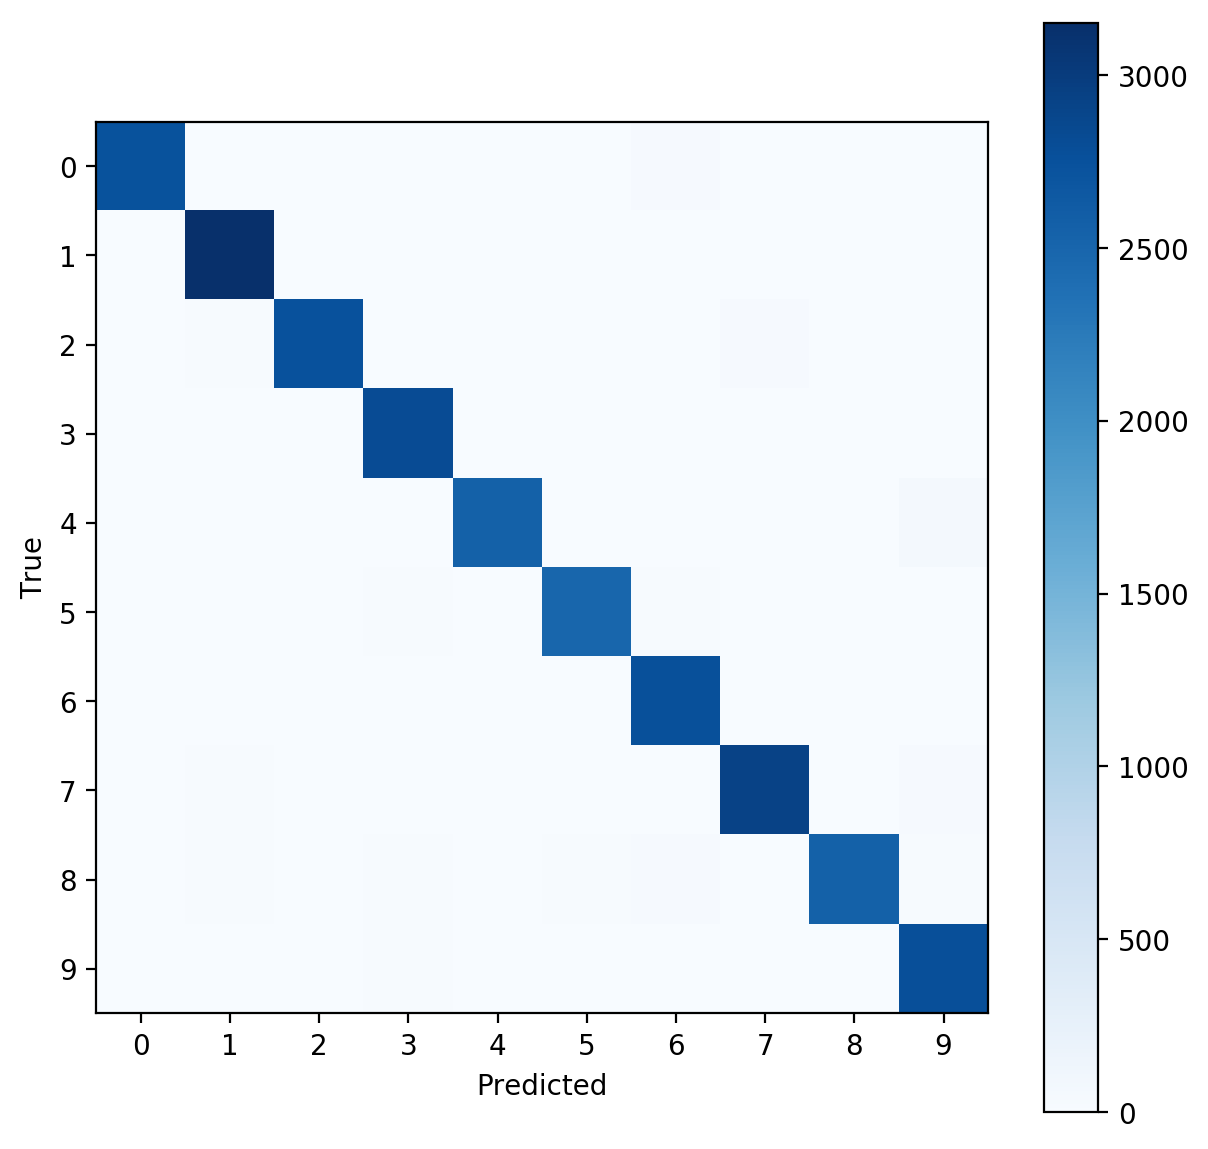

<Figure size 432x288 with 0 Axes>

In [41]:
# Predicting the Test set results
y_pred = model6.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print_confusion_matrix(cm)

[[0.9949604  0.99936689 0.97790449 0.9688936  0.9913142  0.98781447
  0.99313087 0.98760469 0.97523452 0.98687943]
 [0.99103621 0.97468354 0.99528473 0.99890671 0.9916887  0.97365362
  0.99169675 0.98397864 0.9897182  0.97614872]
 [0.99299443 0.9868709  0.98651807 0.98367127 0.99150142 0.98068293
  0.99241329 0.98578833 0.98242298 0.98148475]]


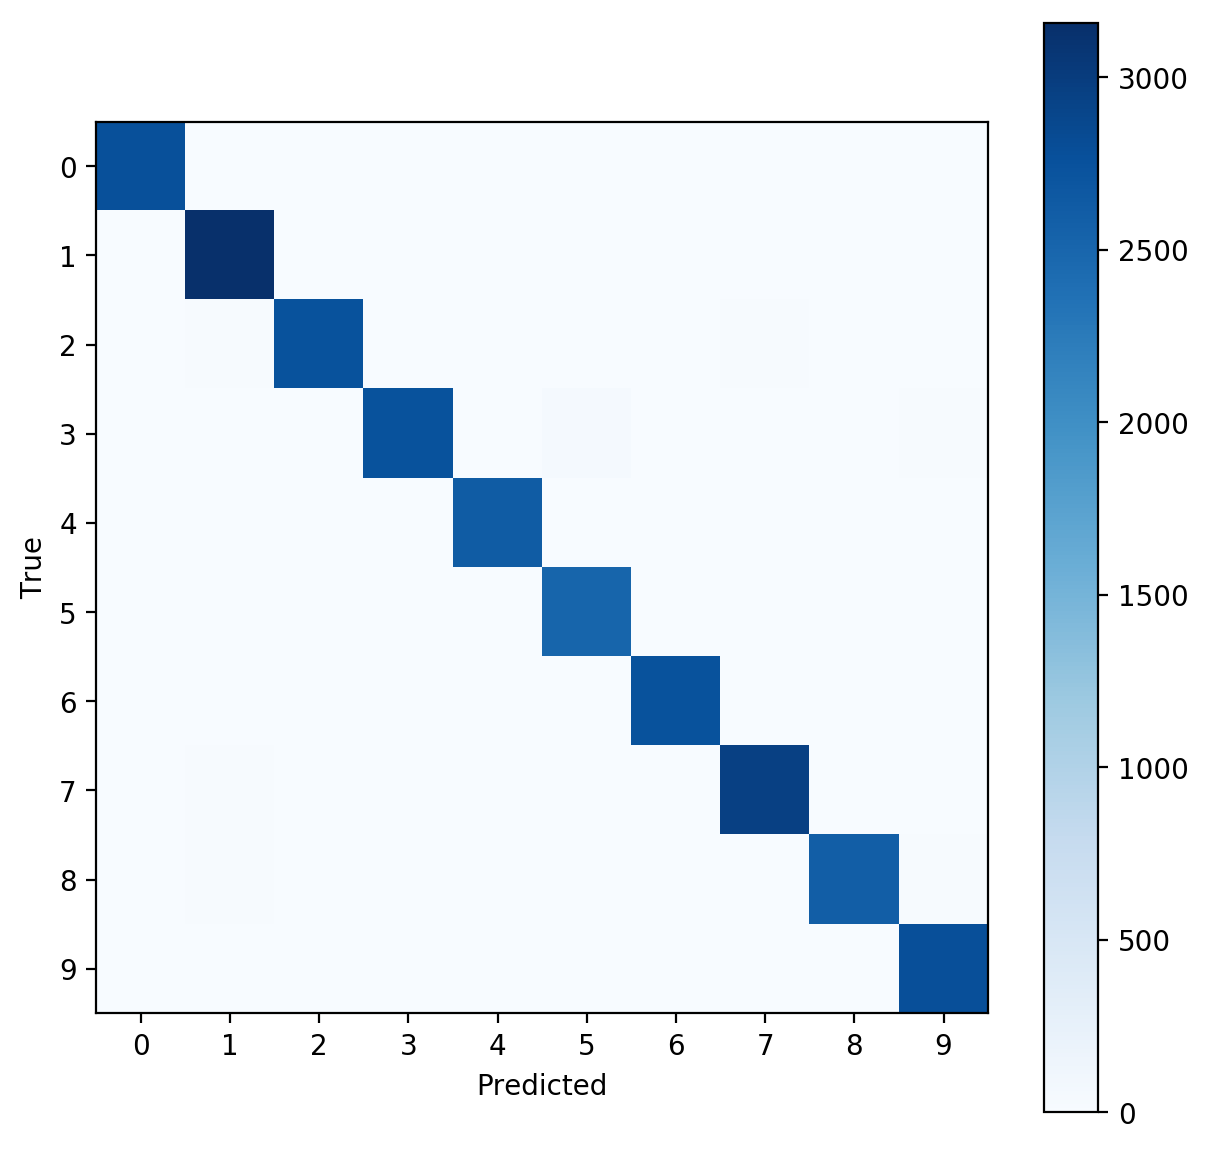

<Figure size 432x288 with 0 Axes>

In [42]:
# Predicting the Test set results
y_pred = model7.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print_confusion_matrix(cm)

In [43]:
weights, biases = model1.layers[0].get_weights()

In [44]:
weights.shape

(5, 5, 1, 32)

In [45]:
t = weights.reshape(5,5,32)

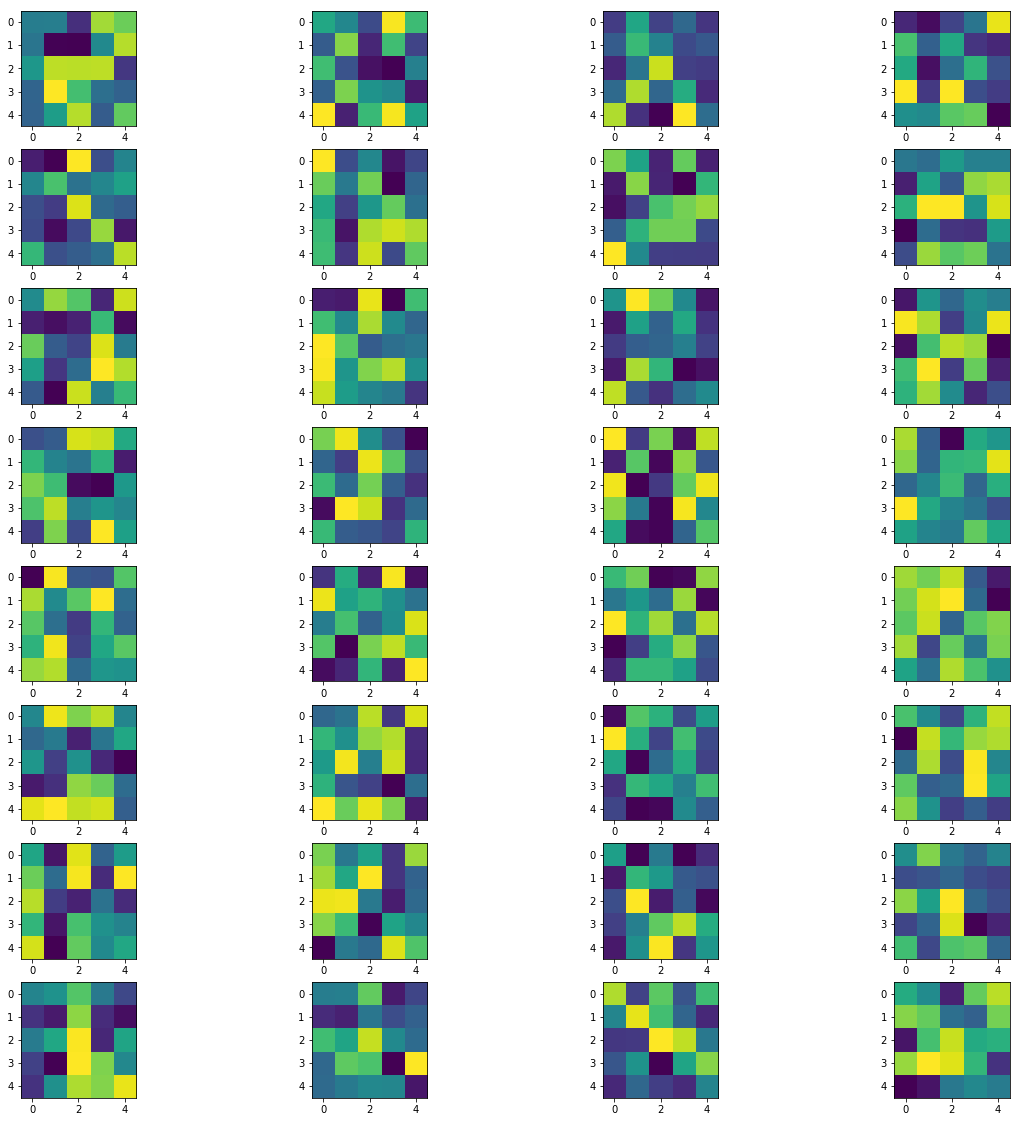

In [46]:
col_size = 4
row_size = 8
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(20,20))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(t[:,:,filter_index])
    filter_index += 1

In [49]:
layer_outputs = [layer.output for layer in model1.layers[:12]] 
# Extracts the outputs of the top 12 layers

activation_model = models.Model(inputs=model1.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

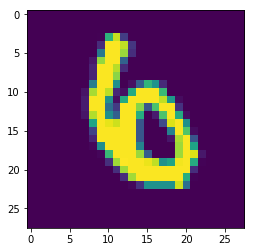

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [50]:
imgplot = plt.imshow(x_test[6].reshape(28,28))
plt.show()
print(y_test[6])

In [51]:
activations = activation_model.predict(x_test[5].reshape(1,28,28,1))
# Returns a list of five Numpy arrays: one array per layer activation

In [52]:
first_layer_activation = activations[1]
print(first_layer_activation.shape)

(1, 28, 28, 32)


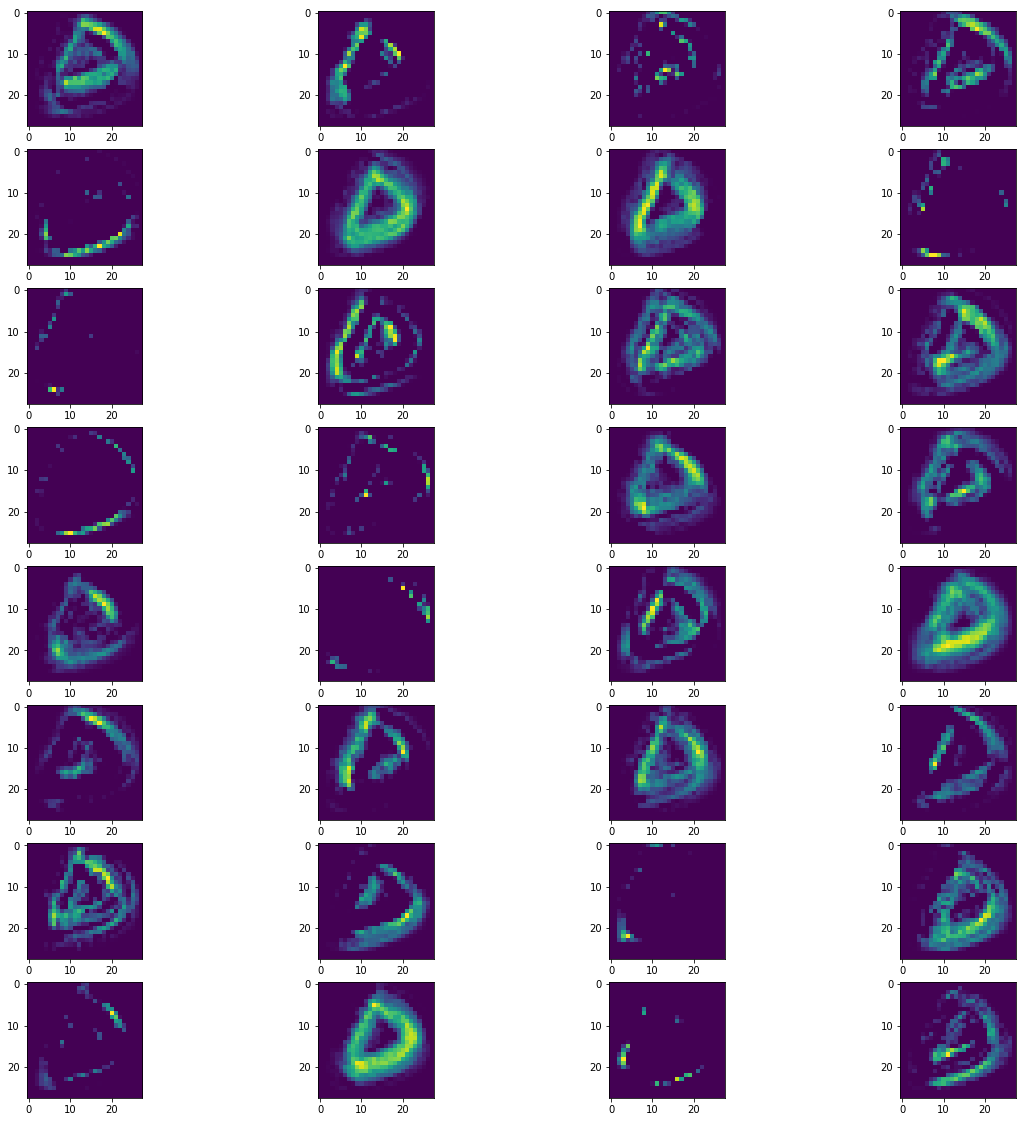

In [53]:
col_size = 4
row_size = 8
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(20,20))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(first_layer_activation[0, :, :, filter_index])
    filter_index += 1

In [54]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 28, 28, 32)


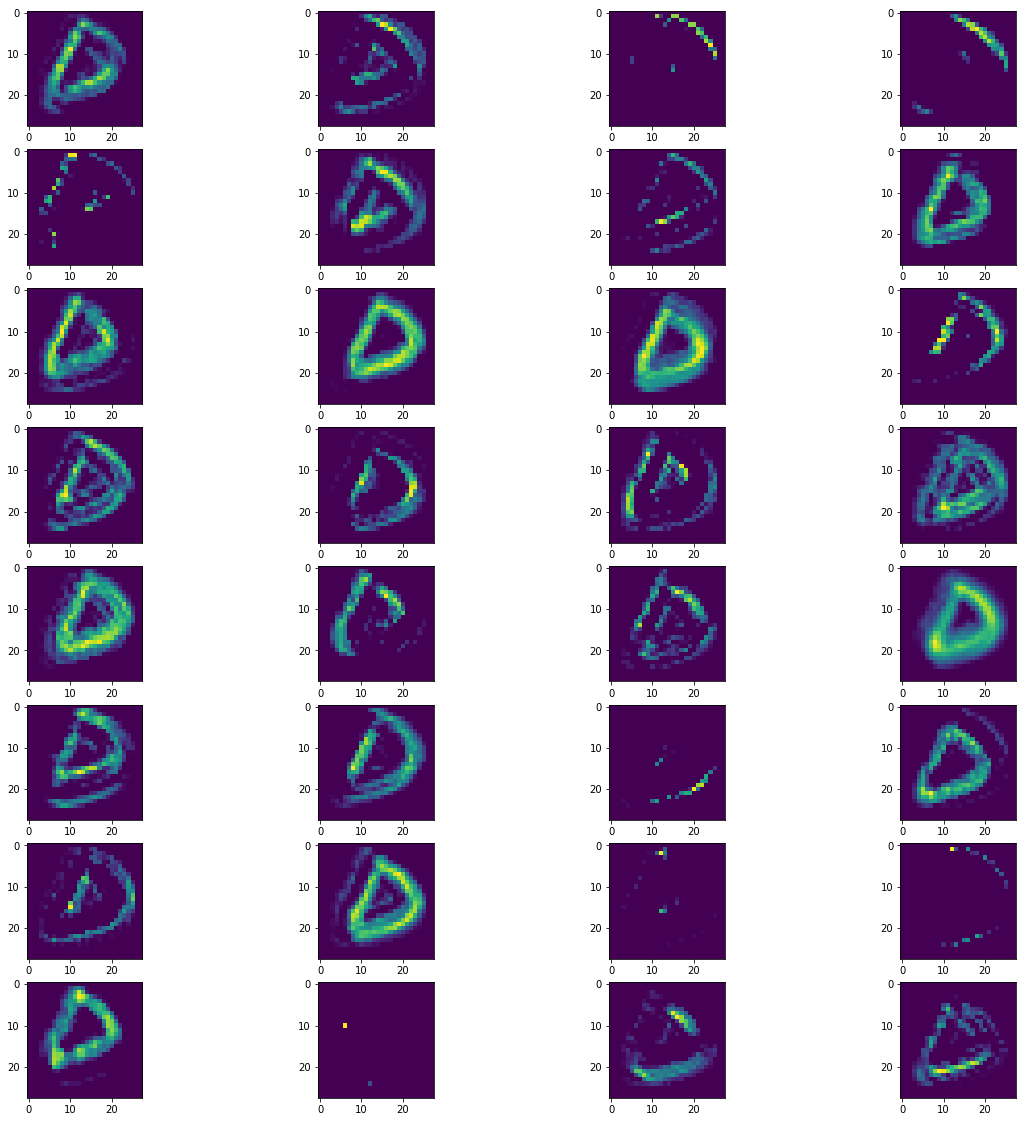

In [55]:
col_size = 4
row_size = 8
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(20,20))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(first_layer_activation[0, :, :, filter_index])
    filter_index += 1

In [56]:
first_layer_activation = activations[2]
print(first_layer_activation.shape)

(1, 28, 28, 32)


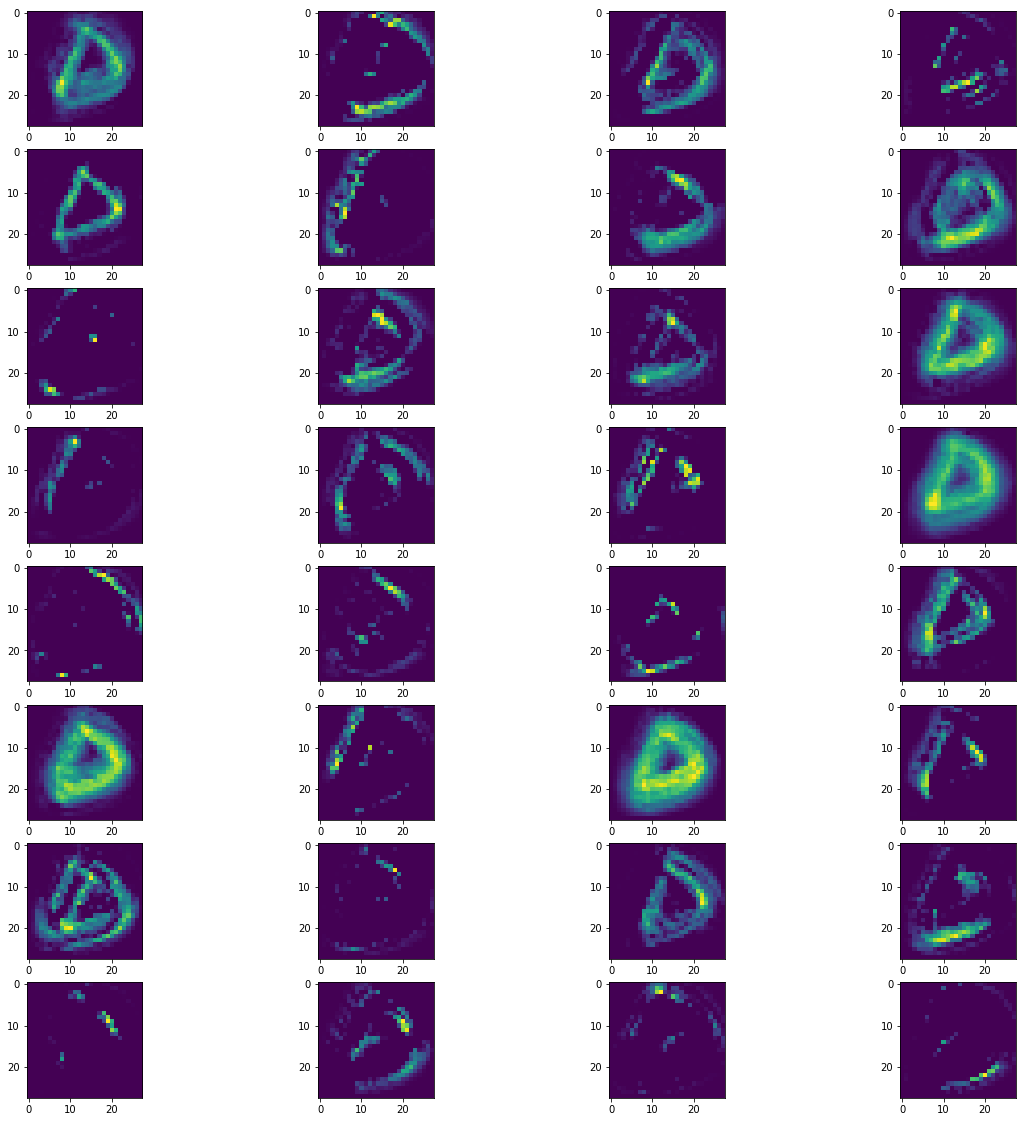

In [57]:
col_size = 4
row_size = 8
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(20,20))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(first_layer_activation[0, :, :, filter_index])
    filter_index += 1

In [58]:
first_layer_activation = activations[3]
print(first_layer_activation.shape)

(1, 28, 28, 32)


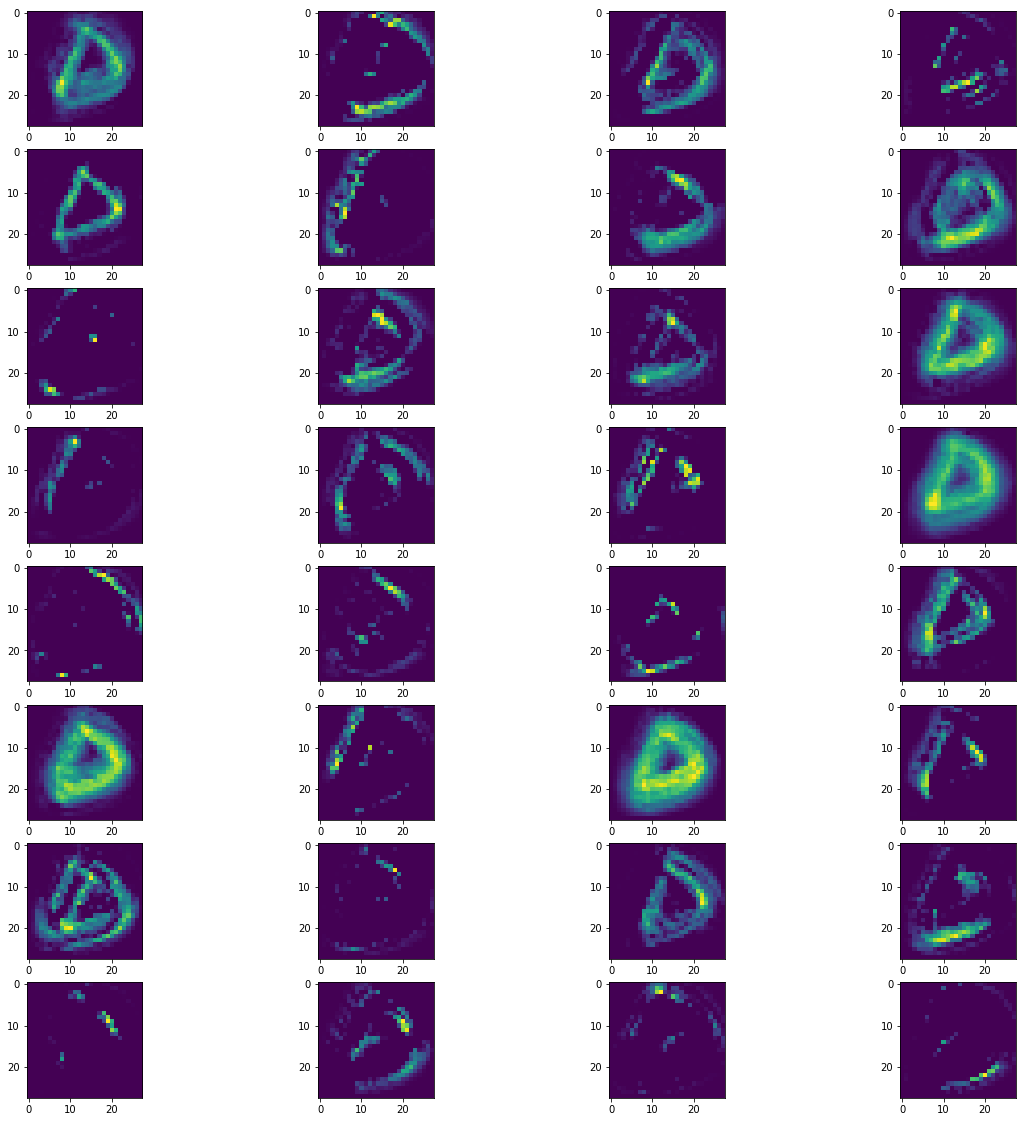

In [59]:
col_size = 4
row_size = 8
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(20,20))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(first_layer_activation[0, :, :, filter_index])
    filter_index += 1

In [60]:
first_layer_activation = activations[4]
print(first_layer_activation.shape)

(1, 14, 14, 32)


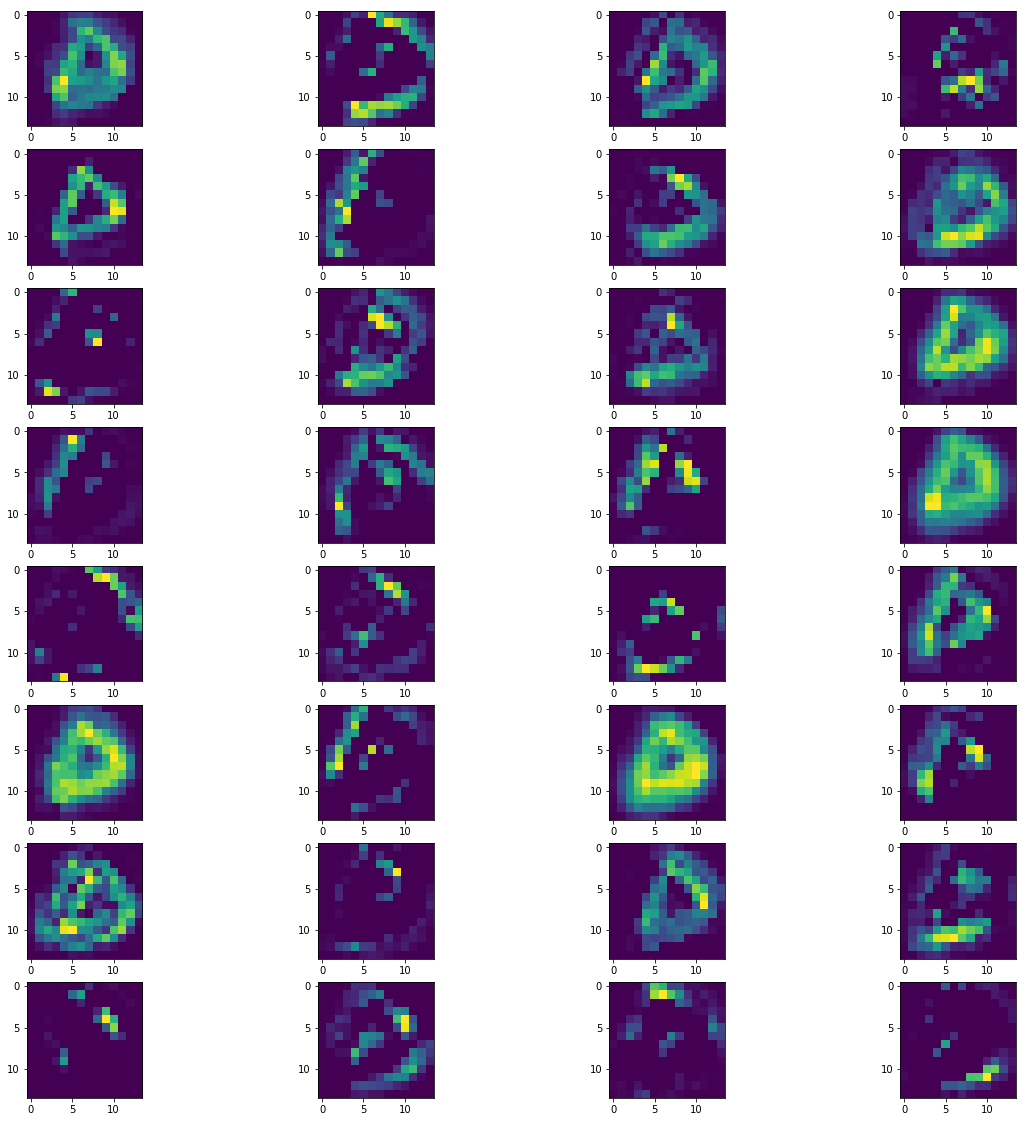

In [61]:
col_size = 4
row_size = 8
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(20,20))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(first_layer_activation[0, :, :, filter_index])
    filter_index += 1

In [18]:
print(model5.output)
flower_output = model5.output[1]

Tensor("dense_1/Softmax:0", shape=(?, 10), dtype=float32)


(28, 28, 1)
(28, 28)
(1, 28, 28, 1)


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node layer_conv1/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](layer_conv1/Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer, layer_conv1/Conv2D/ReadVariableOp)]]

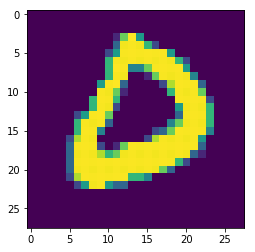

In [32]:
img = x_test[5]
print(img.shape)
img=img.reshape((28,28))
print(img.shape)
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
print(x.shape)


preds = model5.predict(x)
#print ("Predicted: ", decode_predictions(preds, top=3)[0])

#985 is the class index for class 'Daisy' in Imagenet dataset on which my model is pre-trained
print(model5.output)
flower_output = model5.output[1]
last_conv_layer = model5.get_layer('max_pooling2d_1')

grads = K.gradients(flower_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model5.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

#2048 is the number of filters/channels in 'mixed10' layer
for i in range(32):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
print(heatmap.shape)
#     heatmap=heatmap.reshape((11,11))
plt.imshow(heatmap)
plt.savefig("Section2/Image"+str(j+1)+"/HeatmapForClass1")